# Diamond Dataset Analysis

## Questions 
1. What proportion of diamonds are between .30 and 1.08 carats? 
2. How many of the diamonds have equal x and y dimensions? 
3. How many of the diamonds have a carat less than the mean carat value?
4. How many diamonds have a Premium cut or better? Note that the possible values for the quality of a cut are ranked in ascending order as follows: Fair / Good / Very Good / Premium / Ideal 
5. Which diamond has the highest price per carat? What is its value? 
6. Make a bar plot of the ‘cut’ data. What does it tell us about the frequencies of the individual cut values within the data set? 
7. Make boxplots of the diamond price for each cut and discuss any conclusions you can draw from the appearance of the boxplots. 
8. Make histograms of the length, width, depth, and total depth attributes and discuss any conclusions you can draw from the shape of the resulting distributions. 
9. Make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?

### Attributes in dataset

__price__
price in US dollars (\\$326~ $18,823)

__carat__
weight of the diamond (0.2--5.01)

__cut__
quality of the cut (Fair, Good, Very Good, Premium, Ideal)

__color__
diamond colour, from D (best) to J (worst)

__clarity__
a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

__depth__
total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

__table__
width of top of diamond relative to widest point (43--95)

__x__
length in mm (0--10.74)

__y__
width in mm (0--58.9)

__z__
depth in mm (0--31.8)

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [3]:
# Load dataset
diamond = pd.read_csv('https://raw.githubusercontent.com/sunnypark1026/sunnypark/master/Data_Analysis/diamonds.csv')
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### 1) What proportion of diamonds are between .30 and 1.08 carats?

In [4]:
# diamonds are between .30 and 1.08 carats
b30t108 = diamond[(diamond.carat>0.30) & (diamond.carat<1.08)]
b30t108

,carat,cut,color,clarity,depth,table,price,x,y,z
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
15,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68
23,0.31,Very Good,J,SI1,59.4,62.0,353,4.39,4.43,2.62
24,0.31,Very Good,J,SI1,58.1,62.0,353,4.44,4.47,2.59
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
# proportion of b30t108
print('Proportion of b30t108: ',
      (len(b30t108)/len(diamond))*100,'%')

Proportion of b30t108:  69.39933259176864 %


### Proportion of diamonds are between .30 and 1.08 carats is about 69.4%

=======================================================================================

### 2) How many of the diamonds have equal x and y dimensions?

In [6]:
# get diamonds which have equal x and y dimensions
diamond[diamond.x == diamond.y]

,carat,cut,color,clarity,depth,table,price,x,y,z
3397,0.30,Ideal,H,VVS2,62.5,54.0,567,4.30,4.30,2.70
10055,0.27,Very Good,F,VVS1,62.0,55.0,591,4.16,4.16,2.59
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00
16516,1.00,Premium,E,VS2,60.0,60.0,6600,6.43,6.43,3.89
16851,1.00,Premium,E,VS2,60.0,60.0,6720,6.43,6.43,3.89
17368,1.22,Premium,G,SI2,62.4,61.0,6969,6.79,6.79,4.23
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.00
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.00,0.00,0.00
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.00,0.00


In [7]:
# get len(number) of result
len(diamond[diamond.x == diamond.y])

17

### There are 17 diamonds which have equal x and y dimensions

=======================================================================================

### 3) How many of the diamonds have a carat less than the mean carat value? 

In [8]:
# get mean carat value
mean_carat = sp.mean(diamond.carat)
mean_carat

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  


0.7979397478679852

In [9]:
# get diamonds which have less than the mean carat value
less_than_mean_carat = diamond[diamond.carat < mean_carat]
# get len(number) of less_than_mean_carat
len(less_than_mean_carat)

31127

### There are 31127 diamonds which have less than the mean carat value

=======================================================================================

### 4) How many diamonds have a Premium cut or better? Note that the possible values for the quality of a cut are ranked in ascending order as follows: Fair / Good / Very Good / Premium / Ideal

In [10]:
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [11]:
# use value_counts
diamond.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [12]:
# get sum of Ideal and Premium
diamond.cut.value_counts()[0]+diamond.cut.value_counts()[1]

35342

### There are 35342 diamonds which have a Premium cut or better

=======================================================================================

### 5) Which diamond has the highest price per carat? What is its value?

In [13]:
# get each price per carat
highest_price = (diamond.price / diamond.carat)

In [14]:
# add column with highest_price value
diamond['price_per_carat'] = highest_price

In [15]:
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3829.166667
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,3829.166667
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3938.571429
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3205.813953


In [16]:
# sort data by price per carat
diamond.sort_values(by = 'price_per_carat', ascending = False)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
27635,1.04,Very Good,D,IF,61.3,56.0,18542,6.53,6.55,4.01,17828.846154
27530,1.07,Premium,D,IF,60.9,58.0,18279,6.67,6.57,4.03,17083.177570
27226,1.03,Ideal,D,IF,62.0,56.0,17590,6.55,6.44,4.03,17077.669903
27457,1.07,Very Good,D,IF,60.9,58.0,18114,6.57,6.67,4.03,16928.971963
26998,1.02,Very Good,D,IF,61.7,59.0,17100,6.42,6.52,3.99,16764.705882
...,...,...,...,...,...,...,...,...,...,...,...
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71,1109.677419
28285,0.33,Ideal,J,SI2,62.4,54.0,366,4.43,4.45,2.77,1109.090909
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161
15,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68,1078.125000


In [17]:
# A diamond highest price
diamond.sort_values(by = 'price_per_carat', ascending = False).head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
27635,1.04,Very Good,D,IF,61.3,56.0,18542,6.53,6.55,4.01,17828.846154


### The hightest price per carat is about \\$17829($17828.85)

=======================================================================================

### 6) Make a bar plot of the ‘cut’ data. What does it tell us about the frequencies of the individual cut values within the data set?

In [18]:
# get 'cut' data
cut_data = diamond.cut.value_counts()
cut_data

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

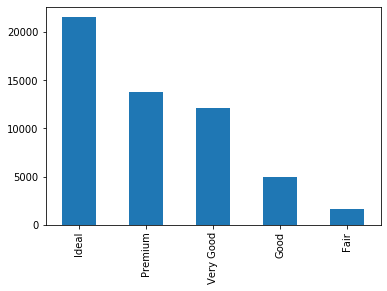

In [19]:
# make a bar plot
cut_data.plot.bar()

### The result(bar plot) shows there are comparatively more higher level of cut values than lower level of cut values. (The possible values for the quality of a cut are ranked in ascending order as follows: Fair / Good / Very Good / Premium / Ideal)

=======================================================================================

### 7) Make boxplots of the diamond price for each cut and discuss any conclusions you can draw from the appearance of the boxplots.

In [20]:
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3829.166667
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,3829.166667
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3938.571429
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3205.813953


In [21]:
# get 'cut','price_per_carat' columns 
# use 'price per carat' because each diamond has different weight
Ideal = diamond[diamond['cut'] == 'Ideal'][['cut','price_per_carat']]
Premium = diamond[diamond['cut'] == 'Premium'][['cut','price_per_carat']]
Very_Good = diamond[diamond['cut'] == 'Very Good'][['cut','price_per_carat']]
Good = diamond[diamond['cut'] == 'Good'][['cut','price_per_carat']]
Fair = diamond[diamond['cut'] == 'Fair'][['cut','price_per_carat']]

In [22]:
# get random sample (size = 1000) values of price_per_carat
np.random.seed(1)
Ideal_random_10 = np.random.choice(Ideal.price_per_carat, size = 1000, replace = False)
Ideal_random_10 = pd.DataFrame(Ideal_random_10, columns = ['Ideal'])

Premium_random_10 = np.random.choice(Premium.price_per_carat, size = 1000, replace = False)
Premium_random_10 = pd.DataFrame(Premium_random_10, columns = ['Premium'])

Very_Good_random_10 = np.random.choice(Very_Good.price_per_carat, size = 1000, replace = False)
Very_Good_random_10 = pd.DataFrame(Very_Good_random_10, columns = ['Very_Good'])

Good_random_10 = np.random.choice(Good.price_per_carat, size = 1000, replace = False)
Good_random_10 = pd.DataFrame(Good_random_10, columns = ['Good'])

Fair_random_10 = np.random.choice(Fair.price_per_carat, size = 1000, replace = False)
Fair_random_10 = pd.DataFrame(Fair_random_10, columns = ['Fair'])

In [23]:
# concatenate each data
whole = pd.concat([Ideal_random_10,Premium_random_10,Very_Good_random_10,
          Good_random_10, Fair_random_10], axis = 1)
whole

,Ideal,Premium,Very_Good,Good,Fair
0,5647.933884,5207.692308,8448.000000,6381.308411,2925.714286
1,2363.157895,7918.666667,4202.469136,2021.739130,4233.663366
2,4976.666667,5157.272727,7352.631579,4023.611111,3561.764706
3,4946.296296,8658.139535,2700.000000,2478.846154,2689.743590
4,3733.333333,2100.000000,2564.788732,1490.000000,6162.551440
...,...,...,...,...,...
995,2193.548387,6637.810945,4665.384615,10208.496732,3737.500000
996,1834.883721,6335.874439,3672.222222,3778.888889,5446.534653
997,5127.205882,6361.386139,1465.384615,3855.714286,6115.000000
998,2363.414634,2362.162162,4840.522876,4882.608696,3511.650485


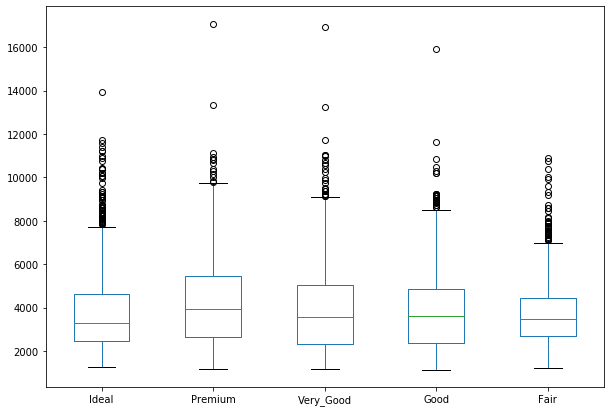

In [24]:
# create the box plot
whole.plot.box(figsize = (10,7))

### According to the box plot, there are so many outliers for each cut. Premium and Very_Good have biggest Inter Quartile Ranges (IQR)  while Ideal and Fair have smallest IQR. That means Premium and Very_Good have more various prices per carat while Ideal and Fair have more constant price.

In [25]:
# Get mean values of each cut
price_per_cut = diamond[['cut','price_per_carat']].groupby('cut').mean()
price_per_cut.index = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
price_per_cut

,price_per_carat
Ideal,3767.255681
Premium,3860.027680
Very Good,3919.699825
Good,4222.905374
Fair,4014.128366


In [26]:
# convert data frame by using T
price_per_cut.T

,Ideal,Premium,Very Good,Good,Fair
price_per_carat,3767.255681,3860.02768,3919.699825,4222.905374,4014.128366


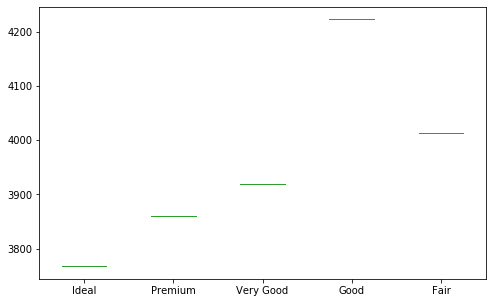

In [27]:
# create box plots
price_per_cut.T.plot.box(figsize = (8,5))

### Interestingly, Good and Fair cuts have the highest prices. Ideal, Premium and Very Good cut shows lower average prices than Good and Fair even though these three cuts have better qualities. 

=======================================================================================

### 8) Make histograms of the length, width, depth, and total depth attributes and discuss any conclusions you can draw from the shape of the resulting distributions.

In [28]:
# length, width, depth, and total depth
# x = length, y = width, z = depth 
len_wid_dep_totaldep = diamond[['depth','x','y','z']]
len_wid_dep_totaldep.head()

,depth,x,y,z
0,61.5,3.95,3.98,2.43
1,59.8,3.89,3.84,2.31
2,56.9,4.05,4.07,2.31
3,62.4,4.20,4.23,2.63
4,63.3,4.34,4.35,2.75


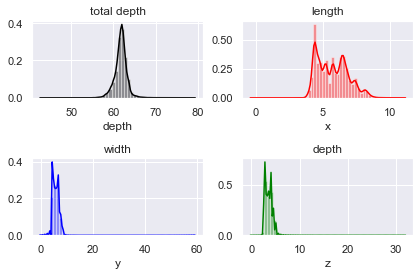

In [29]:
# make histograms of the length, width, depth, and total depth attributes 
import seaborn as sns
sns.set()

# total depth  
plt.subplot(2, 2, 1)
plt.title('total depth')
sns.distplot(len_wid_dep_totaldep.depth, color = 'black')

# length
plt.subplot(2, 2, 2)
plt.title('length')
sns.distplot(len_wid_dep_totaldep.x, color = 'red')

# width
plt.subplot(2, 2, 3)
plt.title('width')
sns.distplot(len_wid_dep_totaldep.y, color = 'blue')

# depth
plt.subplot(2, 2, 4)
plt.title('depth')
sns.distplot(len_wid_dep_totaldep.z, color = 'green')

plt.tight_layout()

### According to the shape of the resulting distributions, histogram of total depths seems to be driven into a specific range. Histograms of width and depth are also driven into specific ranges, but there are more ranges than one. Histogram of length is distributed over various values.
### The wider distribution means there are more various values. Therefore, there are various length of diamond while width, depth and total depth have regular values compare with length.

=======================================================================================

### 9) Make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?

In [30]:
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3829.166667
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,3829.166667
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3938.571429
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3205.813953


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


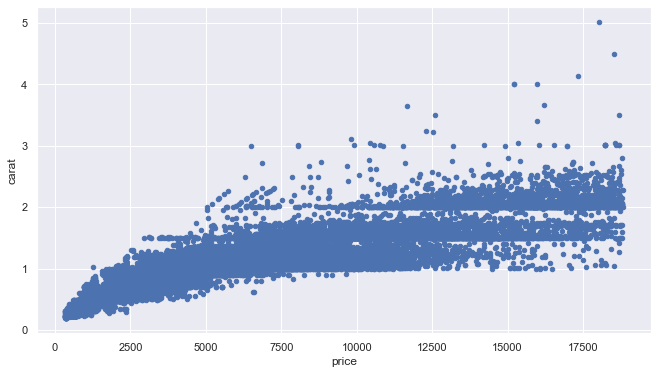

In [31]:
diamond.plot.scatter(x = 'price', y = 'carat', figsize = (11,6))

### According to a scatter plot, there is a proportional relationship between price and carat.